# Bayesian Inference Example

### The data

Two manufacturers, A and B, deliver the same kind of components. Your boss has bought a small sample from each and measured their lifetimes. Now he wants you to decide which manufucturer to buy from. He also tells you that the parts from B are more expensive, but if they live at least three hours longer than those from A buying from B ends up being cheaper. (Adapted from an idea by Jaynes (1976)).

$t$ are lifetimes in hours.

In [1]:
t <- c(59.6, 37.4, 47.6, 40.6, 48.6, 36.3, 31.5, 31.4, 45.7, 48.9, 48.7, 59.2, 51.9)

The factor $mf$ indicates the manufacturer ($A$ or $B$)

In [2]:
mf <- factor(c(rep('A', 9), rep('B', 4)))

Data frame (design matrix) $X$ with columns $t$ and $mf$:

In [3]:
X <- data.frame(t, mf)

$t_A$ contains lifetimes of parts from manufacturer $A$.

In [4]:
t_A <- t[mf=='A']
t_A

[1] 59.6 37.4 47.6 40.6 48.6 36.3 31.5 31.4 45.7

$t_B$ contains lifetimes of parts from manufacturer $B$.

In [5]:
t_B <- t[mf=='B']
t_B

[1] 48.9 48.7 59.2 51.9

Just based on this, who would you buy from?

Graphically:

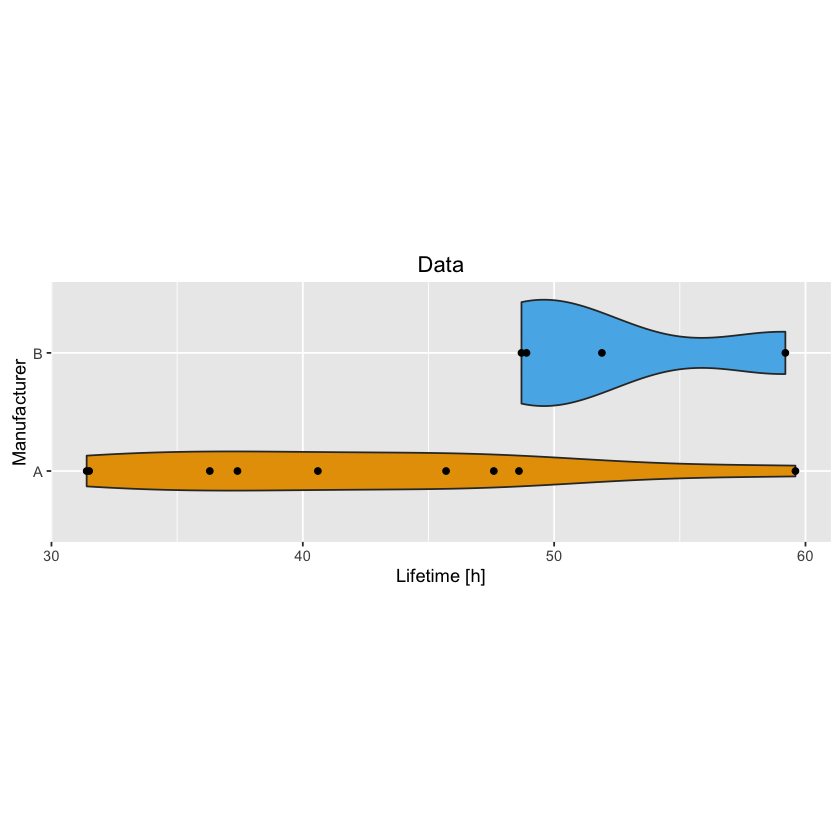

In [6]:
library(ggplot2)
ggplot(X, aes(x = mf, y = t, fill = mf)) +
  labs(title = 'Data', x = 'Manufacturer', y = 'Lifetime [h]') +
  scale_fill_manual(values = c('#E69F00', '#56B4E9')) +
  guides(fill = FALSE) +
  #geom_boxplot(width = 0.5) +
  geom_violin() +
  geom_point() +
  coord_flip() +
  theme(aspect.ratio = 1/3)

### Classical approach: $t$-test

First, test whether $t_A$ and $t_B$ have different variance.

In [7]:
var.test(t_A, t_B)


	F test to compare two variances

data:  t_A and t_B
F = 3.5125, num df = 8, denom df = 3, p-value = 0.3295
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.2415785 19.0236982
sample estimates:
ratio of variances 
          3.512524 


The hypothesis that they have equal variance cannot be rejected ($p=0.3295$). Therefore, perform a $t$-test for equal variances.

In [8]:
t.test(t_A, t_B, var.equal=TRUE)


	Two Sample t-test

data:  t_A and t_B
t = -2.0366, df = 11, p-value = 0.06649
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -21.009449   0.815005
sample estimates:
mean of x mean of y 
 42.07778  52.17500 


Result: the hypothesis that parts from $A$ and parts from $B$ have equal lifetime cannot be rejected ($p=0.066$).

### Classical approach: ordinary least squares (OLS) and generalized linear model (GLM)

The $t$-test for equal variances corresponds exactly to fitting a linear Gaussian model with ordinary least squares (OLS).

In [9]:
ols1 <- lm(t ~ mf, data = X)
summary(ols1)


Call:
lm(formula = t ~ mf, data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.678  -4.678  -1.478   5.522  17.522 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.078      2.750  15.300 9.25e-09 ***
mfB           10.097      4.958   2.037   0.0665 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.25 on 11 degrees of freedom
Multiple R-squared:  0.2738,	Adjusted R-squared:  0.2078 
F-statistic: 4.148 on 1 and 11 DF,  p-value: 0.06649


This corresponds to a linear model of the form

$$ y = \beta_0 + \beta_1 x_{\mathrm{mf}} + \varepsilon, $$

where $\beta_0$ is the intercept $\beta_1$ is the coefficient of the manufacturer indicator $x_{\mathrm{mf}}$ ($x_{\mathrm{mf}} = 0$ for $A$, $x_{\mathrm{mf}} = 1$ for $B$), and $\varepsilon$ is an error term.

However, since lifetimes have a lower bound at zero, it might be more appropriate to log-transform them before fitting a linear Gaussian model:

$$ \log(y) = \beta_0 + \beta_1 x_{\mathrm{mf}} + \varepsilon, $$

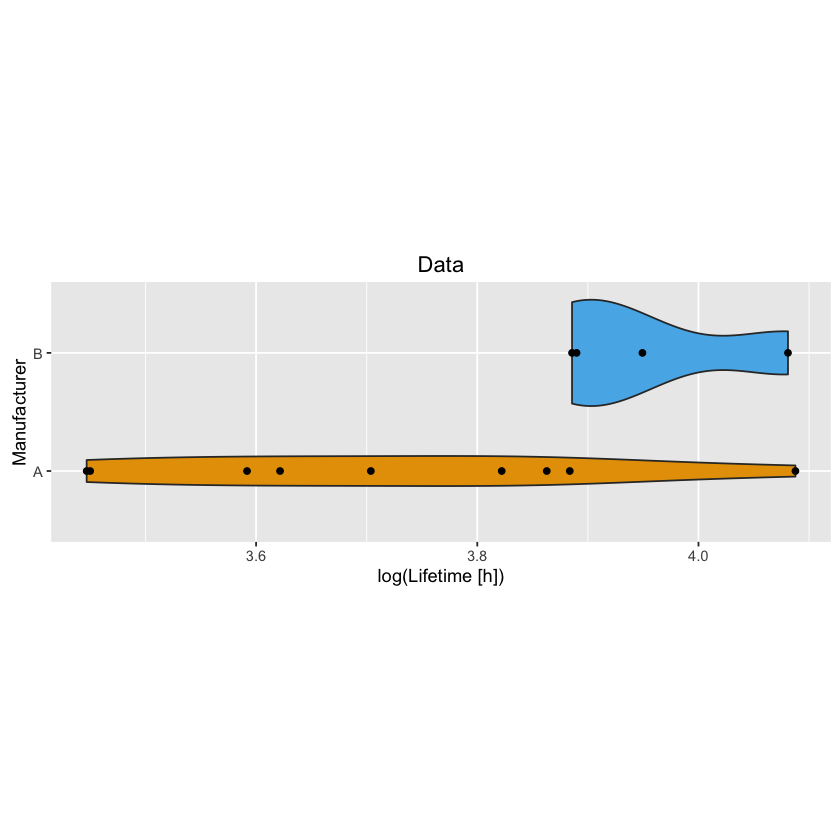

In [10]:
library(ggplot2)
ggplot(X, aes(x = mf, y = log(t), fill = mf)) +
  labs(title = 'Data', x = 'Manufacturer', y = 'log(Lifetime [h])') +
  scale_fill_manual(values = c('#E69F00', '#56B4E9')) +
  guides(fill = FALSE) +
  #geom_boxplot(width = 0.5) +
  geom_violin() +
  geom_point() +
  coord_flip() +
  theme(aspect.ratio = 1/3)

In [11]:
ols2 <- lm(log(t) ~ mf, data = X)
summary(ols2)


Call:
lm(formula = log(t) ~ mf, data = X)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27211 -0.09725 -0.01515  0.12950  0.36874 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.71892    0.06289  59.134    4e-15 ***
mfB          0.23251    0.11338   2.051   0.0649 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1887 on 11 degrees of freedom
Multiple R-squared:  0.2766,	Adjusted R-squared:  0.2108 
F-statistic: 4.206 on 1 and 11 DF,  p-value: 0.06489


A second way to fit the same model in R is to use the `glm()` function. This uses a numerical fitting procedure instead of ordinary least squares.

In [12]:
glm <- glm(t ~ mf, family = gaussian(link = 'log'), data = X)
summary(glm)


Call:
glm(formula = t ~ mf, family = gaussian(link = "log"), data = X)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-10.678   -4.678   -1.478    5.522   17.522  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.73952    0.06536  57.216 5.74e-15 ***
mfB          0.21508    0.10258   2.097   0.0599 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 68.06959)

    Null deviance: 1031.10  on 12  degrees of freedom
Residual deviance:  748.76  on 11  degrees of freedom
AIC: 95.588

Number of Fisher Scoring iterations: 4


As appropriate, this leads to very similar results as ordinary least squares.

### Bayesian approach

Set up the environment.

In [13]:
library(rstanarm)
options(mc.cores = parallel::detectCores())

Loading required package: Rcpp
rstanarm (Version 2.11.1, packaged: 2016-07-29 14:31:44 UTC)
- Do not expect the default priors to remain the same in future rstanarm versions.
Thus, R scripts should specify priors explicitly, even if they are just the defaults.
- For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores())


First, we try to get a rough idea what the distribution of lifetimes looks like.

In [14]:
meant <- mean(t)
sdt <- sd(t)
round(c(meant, sdt), 2)

[1] 45.18  9.27

Next, we fit the same linear Gaussian model as above (`ols1`), but now using Bayesian tools that allow setting priors for all parameters.

$$\begin{align}
y  \;=\;& \beta_0 + \beta_1 x_{\mathrm{mf}} + \varepsilon\\[0.5em]
\varepsilon \;\sim\;& \mathcal{N}(0, \sigma^2)
\end{align}$$

This model has three parameters ($\beta_0$, $\beta_1$, and $\sigma$), all of which require priors.

Loosely based on Gelman et al. (2008, DOI: 10.1214/08-AOAS191), we use a prior centered at 0 for the effect of our predictor with the standard deviation set to 2.5 times the standard deviation of the outcomes. The prior on the intercept is centered on the mean of the outcomes with a standard deviation of 10 times the standard deviation of the outcomes.

We choose a Gaussian prior because we really believe that there are limits to where our estimates can come to lie. If we wanted to be more conservative, we could use a Student-$t$ prior, perhaps even with only one degree of freedeom (ie, a Cauchy distribution).

We keep the `rstanarm` default for the prior on the dispersion (sigma), a half-Cauchy truncated at zero with a scale of 5, but we make it explicit.

$$\begin{align}
\beta_0 \;\sim\;& \mathcal{N}(\mu_0, \sigma_0^2)\\[0.5em]
\beta_1 \;\sim\;& \mathcal{N}(0, \sigma_1^2)\\[0.5em]
\sigma \;\sim\;& \mathrm{Cauchy}(0, \sigma_\varepsilon) \;\;\text{for $\sigma$ > 0,} \;\;\text{0 otherwise}
\end{align}$$

The parameters of the priors ($\mu_0$, $\sigma_0$, $\sigma_1$, and $\sigma_\varepsilon$) are called _hyperparameters_.

In [15]:
system.time(fit1 <- stan_glm(formula = t ~ mf,
                             family = gaussian(link = 'identity'),
                             prior = normal(location = 0,
                                            scale = 2.5*sdt),
                             prior_intercept = normal(location = meant,
                                                      scale = 10*sdt),
                             prior_ops = prior_options(prior_scale_for_dispersion = 5),
                             data = X,
                             chains = 8,                       
                             iter = 5000,                           
                             warmup = 1000,
                             cores = 8))

summary(fit1)

   user  system elapsed 
  1.524   0.511  18.841 

stan_glm(formula = t ~ mf, family = gaussian(link = "identity"), 
    data = X, chains = 8, iter = 5000, warmup = 1000, cores = 8, 
    prior = normal(location = 0, scale = 2.5 * sdt), prior_intercept = normal(location = meant, 
        scale = 10 * sdt), prior_ops = prior_options(prior_scale_for_dispersion = 5))

Family: gaussian (identity)
Algorithm: sampling
Posterior sample size: 32000
Observations: 13

Estimates:
                mean   sd    2.5%   25%   50%   75%   97.5%
(Intercept)    42.1    2.8  36.5   40.3  42.1  43.9  47.6  
mfB            10.1    5.0   0.1    6.9  10.1  13.3  20.2  
sigma           8.6    1.9   5.9    7.3   8.3   9.6  13.1  
mean_PPD       45.2    3.4  38.5   43.0  45.2  47.4  51.9  
log-posterior -57.5    1.3 -60.9  -58.1 -57.2 -56.6 -56.1  

Diagnostics:
              mcse Rhat n_eff
(Intercept)   0.0  1.0  20887
mfB           0.0  1.0  21724
sigma         0.0  1.0  16171
mean_PPD      0.0  1.0  25338
log-posterior 0.0  1.0  12373

For each parameter, mcs

We're done in less than 20 seconds (on a four-year-old MacBook Air).

To look at the results, you can use the built-in plotting function.

ci_level: 0.5 (50% intervals)
outer_level: 0.9 (90% intervals)


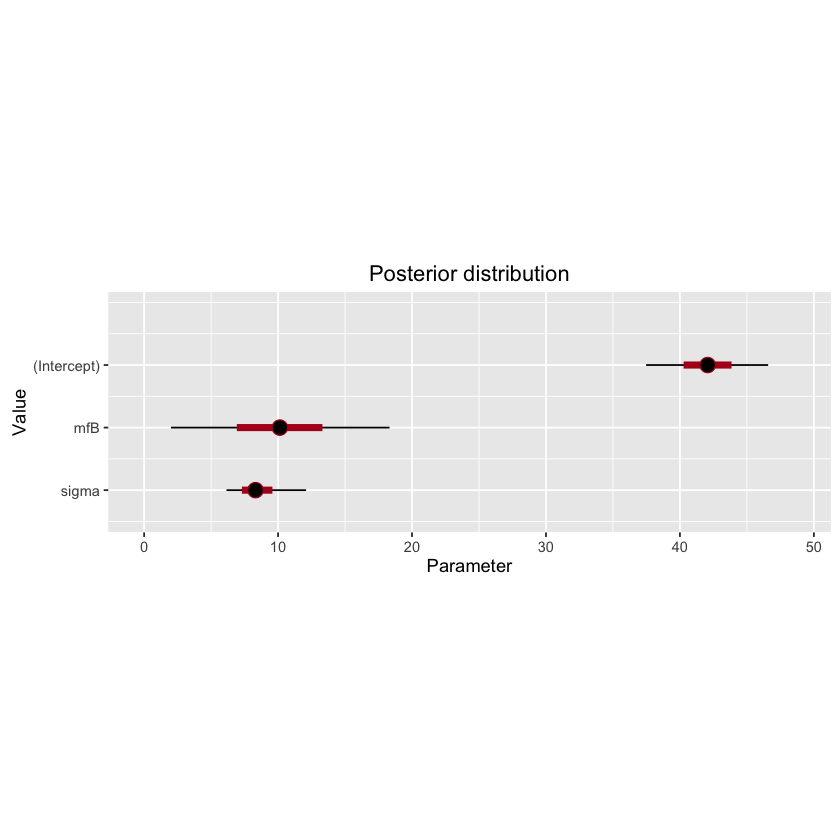

In [16]:
plot(fit1, pars = c('(Intercept)', 'mfB', 'sigma'), ci_level = 0.5, outer_level = 0.9) +
  labs(title = 'Posterior distribution', x = 'Parameter', y = 'Value') +
  theme_grey() +
  theme(aspect.ratio = 1/3)

Or you can produce some fancy violin plots.

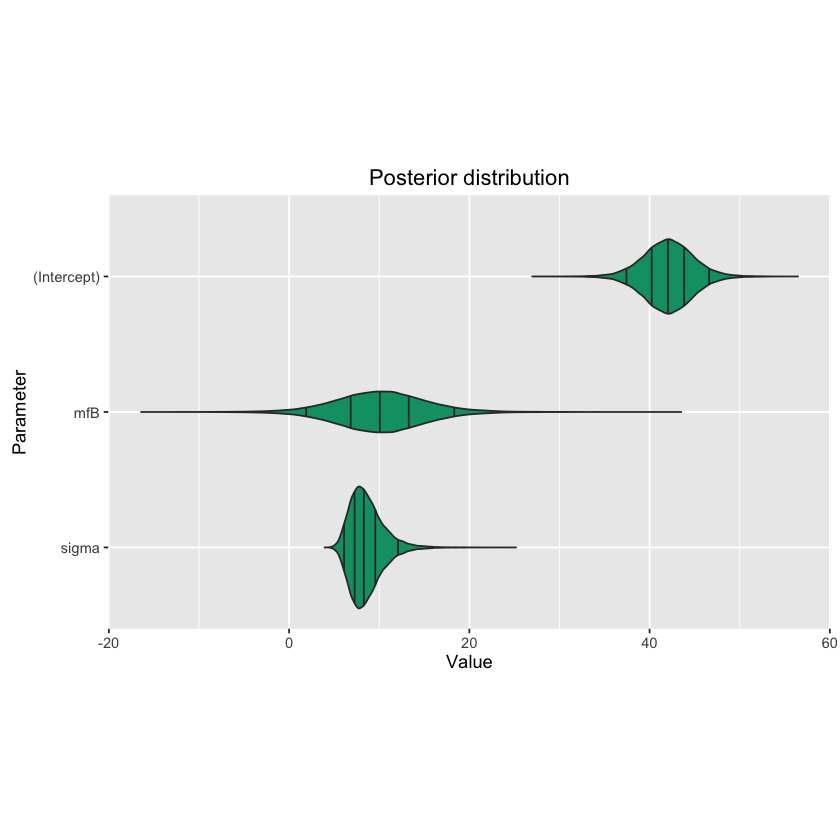

In [17]:
ggplot(stack(as.data.frame(fit1)), aes(x = ind, y = values)) +
  labs(title = 'Posterior distribution', x = 'Parameter', y = 'Value') +
  scale_x_discrete(limits = c('sigma', 'mfB', '(Intercept)')) +
  geom_violin(draw_quantiles = c(0.05, 0.25, 0.5, 0.75, 0.95), fill = '#009E73') +
  coord_flip() +
  theme(aspect.ratio = 3/5)

Now let's see what happens if we tighten the prior on the effect of manufacturer.

This is a more aggressive choice of prior, but (perhaps paradoxically) the increase in shrinkage makes our inference more conservative. Just to show how this works, we're going overboard, using prior an extremely narrow prior with a standard deviation of only 1/4.

In [18]:
system.time(fit2 <- update(fit1,
                           prior = normal(location = 0,
                                          scale = 1/4)))

summary(fit2)

   user  system elapsed 
  1.018   0.169  17.338 

stan_glm(formula = t ~ mf, family = gaussian(link = "identity"), 
    data = X, chains = 8, iter = 5000, warmup = 1000, cores = 8, 
    prior = normal(location = 0, scale = 1/4), prior_intercept = normal(location = meant, 
        scale = 10 * sdt), prior_ops = prior_options(prior_scale_for_dispersion = 5))

Family: gaussian (identity)
Algorithm: sampling
Posterior sample size: 32000
Observations: 13

Estimates:
                mean   sd    2.5%   25%   50%   75%   97.5%
(Intercept)    43.8    2.6  38.8   42.1  43.7  45.5  49.1  
mfB             4.5    3.4  -2.5    2.3   4.6   6.9  11.0  
sigma           8.8    1.9   6.0    7.5   8.5   9.8  13.5  
mean_PPD       45.2    3.4  38.3   43.0  45.2  47.4  52.0  
log-posterior -58.7    1.2 -61.9  -59.2 -58.3 -57.8 -57.3  

Diagnostics:
              mcse Rhat n_eff
(Intercept)   0.0  1.0  20766
mfB           0.0  1.0  21904
sigma         0.0  1.0  16816
mean_PPD      0.0  1.0  24493
log-posterior 0.0  1.0  13699

For each parameter, mcse is M

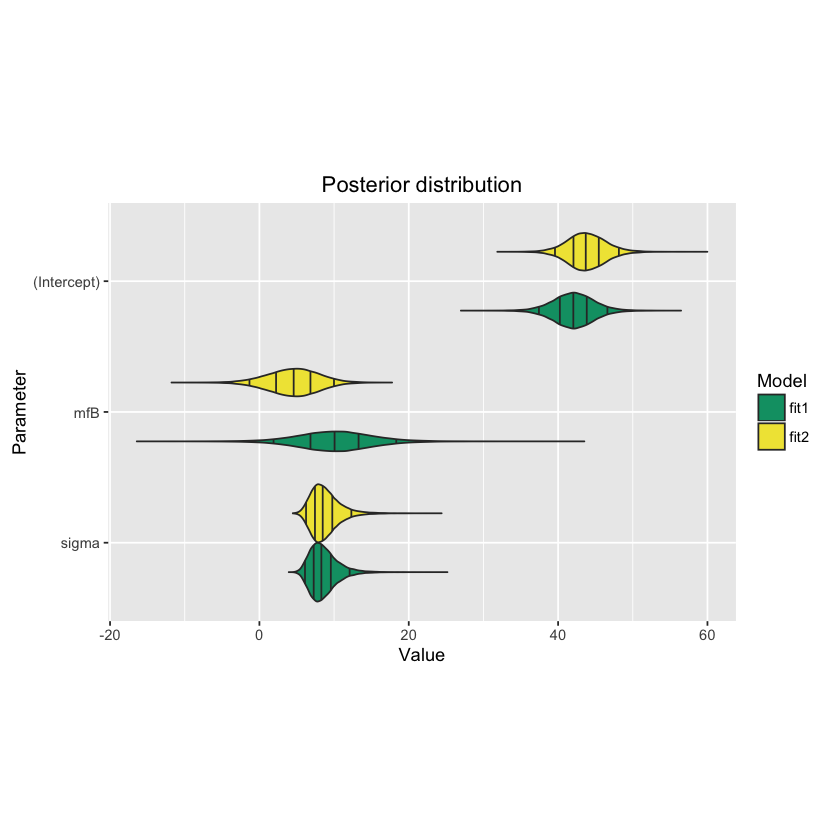

In [19]:
values = c(stack(as.data.frame(fit1))$values, stack(as.data.frame(fit2))$values)
ind = factor(c(stack(as.data.frame(fit1))$ind, stack(as.data.frame(fit2))$ind), labels = c('(Intercept)', 'mfB', 'sigma'))
model = gl(2, length(values)/2, length(values), labels = c('fit1', 'fit2'))

ggplot(data.frame(values, ind, model), aes(x = ind, y = values, fill = model)) +
  labs(title = 'Posterior distribution', x = 'Parameter', y = 'Value', fill = 'Model') +
  scale_fill_manual(values = c('#009E73', '#F0E442')) +
  scale_x_discrete(limits = c('sigma', 'mfB', '(Intercept)')) +
  geom_violin(draw_quantiles = c(0.05, 0.25, 0.5, 0.75, 0.95), position = position_dodge(0.9)) +
  #geom_boxplot(width = 0.1, position = position_dodge(0.9)) +
  coord_flip() +
  theme(aspect.ratio = 2/3)

In [20]:
fit2

stan_glm(formula = t ~ mf, family = gaussian(link = "identity"), 
    data = X, chains = 8, iter = 5000, warmup = 1000, cores = 8, 
    prior = normal(location = 0, scale = 1/4), prior_intercept = normal(location = meant, 
        scale = 10 * sdt), prior_ops = prior_options(prior_scale_for_dispersion = 5))

Estimates:
            Median MAD_SD
(Intercept) 43.7    2.5  
mfB          4.6    3.4  
sigma        8.5    1.7  

Sample avg. posterior predictive 
distribution of y (X = xbar):
         Median MAD_SD
mean_PPD 45.2    3.2  

Everything still works very nicely.

The shrinkage on the mfB effect is clearly visible. However, you can also see that if you have a real effect, it will manage to overwhelm even quite strong shrinkage. The posterior medain of mfB is at 4.6 even though the prior was centered at 0 with a standard deviation of 1/4.

Now we do the same as in the classical approach and log-transform the lifetimes.

In [21]:
meanlogt <- mean(log(t))
sdlogt <- sd(log(t))
round(c(meanlogt, sdlogt), 2)

[1] 3.79 0.21

In [22]:
system.time(fit3 <- update(fit1,
                           family = gaussian(link = 'log'),
                           prior = normal(location = 0,
                                          scale = 2.5*sdlogt),
                           prior_intercept = normal(location = meanlogt,
                                                    scale = 10*sdlogt)))

summary(fit3)

   user  system elapsed 
  1.182   0.195  19.871 

stan_glm(formula = t ~ mf, family = gaussian(link = "log"), data = X, 
    chains = 8, iter = 5000, warmup = 1000, cores = 8, prior = normal(location = 0, 
        scale = 2.5 * sdlogt), prior_intercept = normal(location = meanlogt, 
        scale = 10 * sdlogt), prior_ops = prior_options(prior_scale_for_dispersion = 5))

Family: gaussian (log)
Algorithm: sampling
Posterior sample size: 32000
Observations: 13

Estimates:
                mean   sd    2.5%   25%   50%   75%   97.5%
(Intercept)     3.7    0.1   3.6    3.7   3.7   3.8   3.9  
mfB             0.2    0.1   0.0    0.2   0.2   0.3   0.5  
sigma           0.2    0.1   0.1    0.2   0.2   0.2   0.3  
mean_PPD        3.8    0.1   3.6    3.7   3.8   3.8   4.0  
log-posterior -56.5    1.3 -60.0  -57.1 -56.2 -55.6 -55.1  

Diagnostics:
              mcse Rhat n_eff
(Intercept)   0.0  1.0  20360
mfB           0.0  1.0  20090
sigma         0.0  1.0  16633
mean_PPD      0.0  1.0  25079
log-posterior 0.0  1.0  12341

For each parameter, 

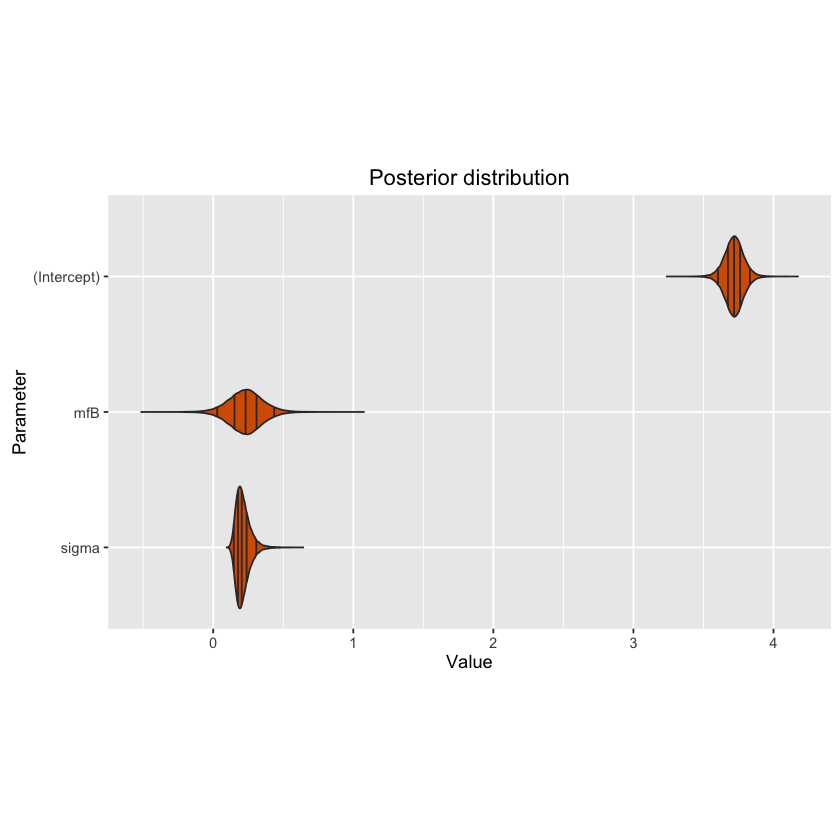

In [23]:
ggplot(stack(as.data.frame(fit3)), aes(x = ind, y = values)) +
  labs(title = 'Posterior distribution', x = 'Parameter', y = 'Value') +
  scale_x_discrete(limits = c('sigma', 'mfB', '(Intercept)')) +
  geom_violin(draw_quantiles = c(0.05, 0.25, 0.5, 0.75, 0.95), fill = '#D55E00') +
  coord_flip() +
  theme(aspect.ratio = 3/5)

### Model checking

We check our models by looking at posterior predictive simulations for each manufacturer under each model.

In [24]:
X_p <- data.frame(mf = factor(c('A', 'B')))

In [25]:
t_p1 <- posterior_predict(fit1, newdata = X_p)
t_p2 <- posterior_predict(fit2, newdata = X_p)
t_p3 <- posterior_predict(fit3, newdata = X_p)

In [26]:
colnames(t_p1) <- c('A', 'B')
summary(t_p1)

       A                B         
 Min.   :-13.60   Min.   :  4.32  
 1st Qu.: 36.20   1st Qu.: 46.06  
 Median : 42.10   Median : 52.21  
 Mean   : 42.14   Mean   : 52.26  
 3rd Qu.: 48.13   3rd Qu.: 58.42  
 Max.   :108.78   Max.   :110.58  

The simulations for `fit1` show that the model predicts lifetime distributions that reach into the negative. This doesn't make sense.

In [27]:
colnames(t_p2) <- c('A', 'B')
summary(t_p2)

       A                B         
 Min.   :-8.364   Min.   : -3.70  
 1st Qu.:37.849   1st Qu.: 42.25  
 Median :43.725   Median : 48.38  
 Mean   :43.874   Mean   : 48.34  
 3rd Qu.:49.766   3rd Qu.: 54.61  
 Max.   :95.084   Max.   :102.21  

The same problem occurs with `fit2`.

In [28]:
colnames(t_p3) <- c('A', 'B')
summary(t_p3)

       A               B        
 Min.   :25.29   Min.   :28.59  
 1st Qu.:39.49   1st Qu.:48.71  
 Median :41.24   Median :52.00  
 Mean   :41.33   Mean   :52.31  
 3rd Qu.:43.05   3rd Qu.:55.52  
 Max.   :65.17   Max.   :98.12  

However, `fit3`'s posterior predictions are much more appropriate. This is because we had the good sense to log-transform the lifetimes in our Gaussian model to reflect their boundedness at zero.

In a graph, our results look like this:

In [29]:
t_p <- c(matrix(t_p1, ncol = 1), matrix(t_p2, ncol = 1), matrix(t_p3, ncol = 1))
n <- length(t_p)
mf_p <- gl(2, n/6, n, labels = c('A', 'B'))
fit_p <- gl(3, n/3, n, labels = c('fit1', 'fit2', 'fit3'))
X_t_p <- data.frame(t_p, mf_p, fit_p)

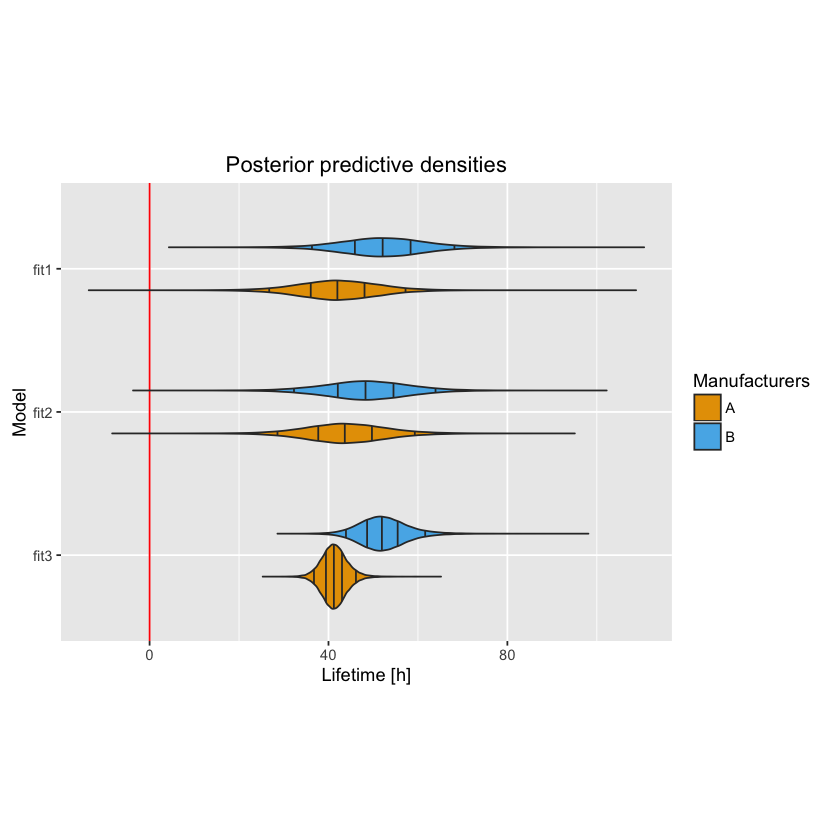

In [30]:
ggplot(X_t_p, aes(x = fit_p, y = t_p, fill = mf_p)) +
  labs(title = 'Posterior predictive densities', x = 'Model', y = 'Lifetime [h]', fill = 'Manufacturers') +
  scale_fill_manual(values = c('#E69F00', '#56B4E9')) +
  scale_x_discrete(limits = c('fit3', 'fit2', 'fit1')) +
  geom_hline(yintercept = 0, colour = 'red') +
  geom_violin(draw_quantiles = c(0.05, 0.25, 0.5, 0.75, 0.95), position = position_dodge(0.6)) +
  coord_flip() +
  theme(aspect.ratio = 3/4)

Using the posterior predictions, we can now estimate the probability that a part manufactured by $B$ lasts at least three hours longer than one manufactured by $A$.

In [31]:
diff1 <- t_p[fit_p == 'fit1' & mf_p == 'B'] - t_p[fit_p == 'fit1' & mf_p == 'A']
diff2 <- t_p[fit_p == 'fit2' & mf_p == 'B'] - t_p[fit_p == 'fit2' & mf_p == 'A']
diff3 <- t_p[fit_p == 'fit3' & mf_p == 'B'] - t_p[fit_p == 'fit3' & mf_p == 'A']

pdiff1_3plus <- mean(t_p[fit_p == 'fit1' & mf_p == 'B'] - t_p[fit_p == 'fit1' & mf_p == 'A'] > 3)
pdiff2_3plus <- mean(t_p[fit_p == 'fit2' & mf_p == 'B'] - t_p[fit_p == 'fit2' & mf_p == 'A'] > 3)
pdiff3_3plus <- mean(t_p[fit_p == 'fit3' & mf_p == 'B'] - t_p[fit_p == 'fit3' & mf_p == 'A'] > 3)

round(c(pdiff1_3plus, pdiff2_3plus, pdiff3_3plus), 2)

[1] 0.71 0.55 0.92

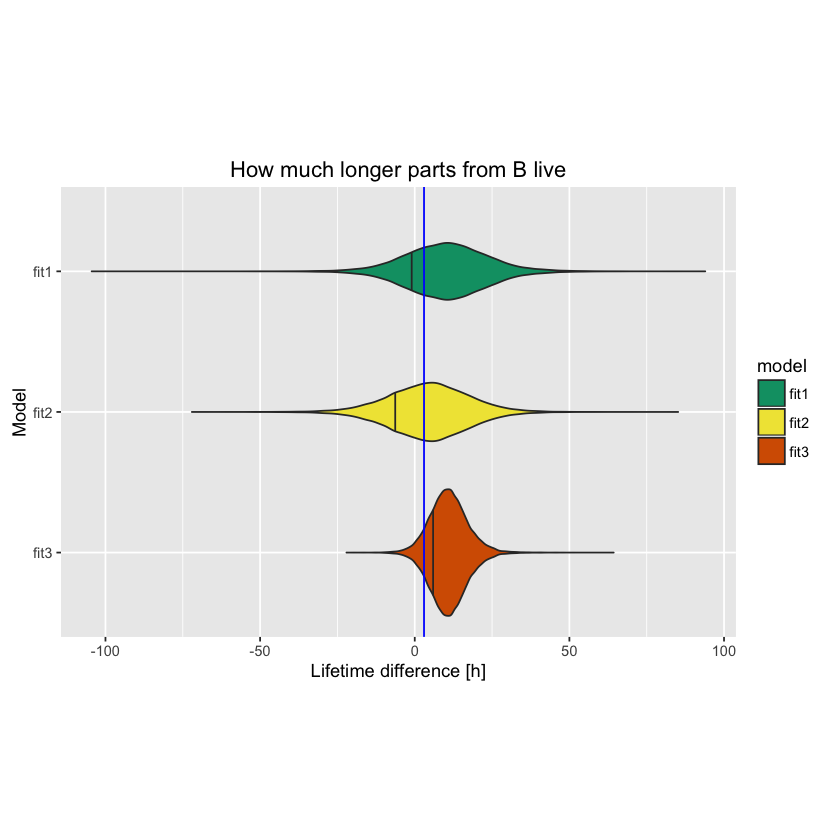

In [32]:
diff <- c(diff1, diff2, diff3)
n <- length(diff)
model <- gl(3, n/3, n, labels = c('fit1', 'fit2', 'fit3'))

ggplot(data.frame(diff, model), aes(x = model, y = diff, fill = model)) +
  labs(title = 'How much longer parts from B live', x = 'Model', y = 'Lifetime difference [h]') +
  scale_fill_manual(values = c('#009E73', '#F0E442', '#D55E00')) +
  scale_x_discrete(limits = c('fit3', 'fit2', 'fit1')) +
  geom_violin(draw_quantiles = c(0.2)) +
  geom_hline(yintercept = 3, colour = 'blue') +
  coord_flip() +
  theme(aspect.ratio = 2/3)

### Formal model comparison criteria

In principle, the ratio between the model evidences, called the Bayes factor, is the best quantity to compare models (cf. Neyman-Pearson lemma). Whenever you have informative priors and a way to approximate the model evidence, it's a good measure to use (with the caveat that your model shouldn't be a point hypothesis like $\beta_1 = 0$ when $\beta_1$ is a continuous parameter). 

Unfortunately, the model evidence is hard to compute by sampling. However, the `loo` package contains functions that can sometimes approximate the expected log predicted density (ELPD), a surrogate for the model evidence inspired by predictive model checking.

For example, the `loo()` function allows us to assess model performance using leave-one-out cross-validation.

In [33]:
loo1 <- loo(fit1)

In [34]:
loo2 <- loo(fit2)

In [35]:
loo3 <- loo(fit3)

Warning message:
: Found 13 observations with a pareto_k > 0.7. With this many problematic observations we recommend calling 'kfold' with argument 'K=10' to perform 10-fold cross-validation rather than LOO.

Since this doesn't work for `fit3`, we switch to fivefold cross-validation. This has the drawback that it's much slower.

In [36]:
system.time(fivefold1 <- kfold(fit1, K = 5))

Fitting model 1 out of 5
Fitting model 2 out of 5
Fitting model 3 out of 5
Fitting model 4 out of 5
Fitting model 5 out of 5


   user  system elapsed 
  5.427   0.968  92.278 

In [37]:
system.time(fivefold2 <- kfold(fit2, K = 5))

Fitting model 1 out of 5
Fitting model 2 out of 5
Fitting model 3 out of 5
Fitting model 4 out of 5
Fitting model 5 out of 5


   user  system elapsed 
  5.409   0.870  92.810 

In [38]:
system.time(fivefold3 <- kfold(fit3, K = 5))

Fitting model 1 out of 5
Fitting model 2 out of 5
Fitting model 3 out of 5
Fitting model 4 out of 5
Fitting model 5 out of 5


   user  system elapsed 
  5.595   0.938  95.756 

In [39]:
round(compare(fivefold1, fivefold2, fivefold3), 2)

,elpd_kfold,se_elpd_kfold
fivefold2,-48.38,2.67
fivefold1,-48.44,2.86
fivefold3,-57.34,7.48


These results are inconclusive.

Another measure is the Watanabe-Akaike information criterion (WAIC), but in our case it again doesn't work for `fit3`.

In [40]:
waic1 = waic(fit1)
waic2 = waic(fit2)
waic3 = waic(fit3)

round(compare(waic1, waic2, waic3), 2)

,waic,se_waic,elpd_waic,se_elpd_waic,p_waic,se_p_waic
waic1,95.19,5.69,-47.60,2.85,2.27,0.94
waic2,95.46,4.90,-47.73,2.45,1.91,0.65
waic3,18631774.47,9172519.45,-9315887.23,4586259.72,9315830.91,4586253.98


### Conclusion

In conclusion, there's a strong case that `fit3` is our best model because its predictions make sense. Applying formal model comparison criteria can often be helpful, but their computation can be difficult.

Fitting models with informative priors and looking posterior and posterior predictive densities is clearly superior to the blind application of null hypothesis significance test with flat priors for (at least) the following reasons:

- Informative priors ensure that implausible effect sizes are assigned little to no prior probability mass.

- Informative priors take care of the multiple comparison problem (not explained here - google it).

- Informative priors stabilize the numerics of inferential approximations.

- Bayesian inference doesn't throw away information by making binary presence/absence decisions. 